In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
 
Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.

In [2]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [140]:
cols = ('age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital-status', 'occupation', 'relationship',
       'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native_country', 'income')

df = pd.read_csv(r"D:\Py.self\adult\adult.data", names = cols)
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [66]:
df = pd.concat([df.drop('occupation', axis = 1), pd.get_dummies(df.occupation).astype(int).add_prefix('occupation')], axis = 1)
df = pd.concat([df.drop('workclass', axis = 1), pd.get_dummies(df.workclass).astype(int).add_prefix('workclass')], axis = 1)
df = df.drop('education', axis = 1)
df = pd.concat([df.drop('marital-status', axis = 1), pd.get_dummies(df['marital-status']).astype(int).add_prefix('marital-status')], axis = 1)
df = pd.concat([df.drop('relationship', axis = 1), pd.get_dummies(df.relationship).astype(int).add_prefix('relationship')], axis = 1)
df = pd.concat([df.drop('race', axis = 1), pd.get_dummies(df.race).astype(int).add_prefix('race')], axis = 1)
df = pd.concat([df.drop('native_country', axis = 1), pd.get_dummies(df.native_country).astype(int).add_prefix('native_country')], axis = 1)

# Splitting the dataset to increase the variables that will be put into the model for greater accuracy

In [67]:
df['gender'] = (df['gender'] == ' Male').astype(int)
df['income'] = (df['income'] == ' >50K').astype(int)

# Changing the binary datatype to 1s and 0s using OHE.

In [141]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [142]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [143]:
df['education'].value_counts()

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

In [68]:
df

,age,fnlwgt,education_num,gender,capital-gain,capital-loss,hours-per-week,income,occupation ?,occupation Adm-clerical,...,native_country Portugal,native_country Puerto-Rico,native_country Scotland,native_country South,native_country Taiwan,native_country Thailand,native_country Trinadad&Tobago,native_country United-States,native_country Vietnam,native_country Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [69]:
df.columns.values

array(['age', 'fnlwgt', 'education_num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation ?',
       'occupation Adm-clerical', 'occupation Armed-Forces',
       'occupation Craft-repair', 'occupation Exec-managerial',
       'occupation Farming-fishing', 'occupation Handlers-cleaners',
       'occupation Machine-op-inspct', 'occupation Other-service',
       'occupation Priv-house-serv', 'occupation Prof-specialty',
       'occupation Protective-serv', 'occupation Sales',
       'occupation Tech-support', 'occupation Transport-moving',
       'workclass ?', 'workclass Federal-gov', 'workclass Local-gov',
       'workclass Never-worked', 'workclass Private',
       'workclass Self-emp-inc', 'workclass Self-emp-not-inc',
       'workclass State-gov', 'workclass Without-pay',
       'marital-status Divorced', 'marital-status Married-AF-spouse',
       'marital-status Married-civ-spouse',
       'marital-status Married-spouse-absent',
       'marita

<Axes: >

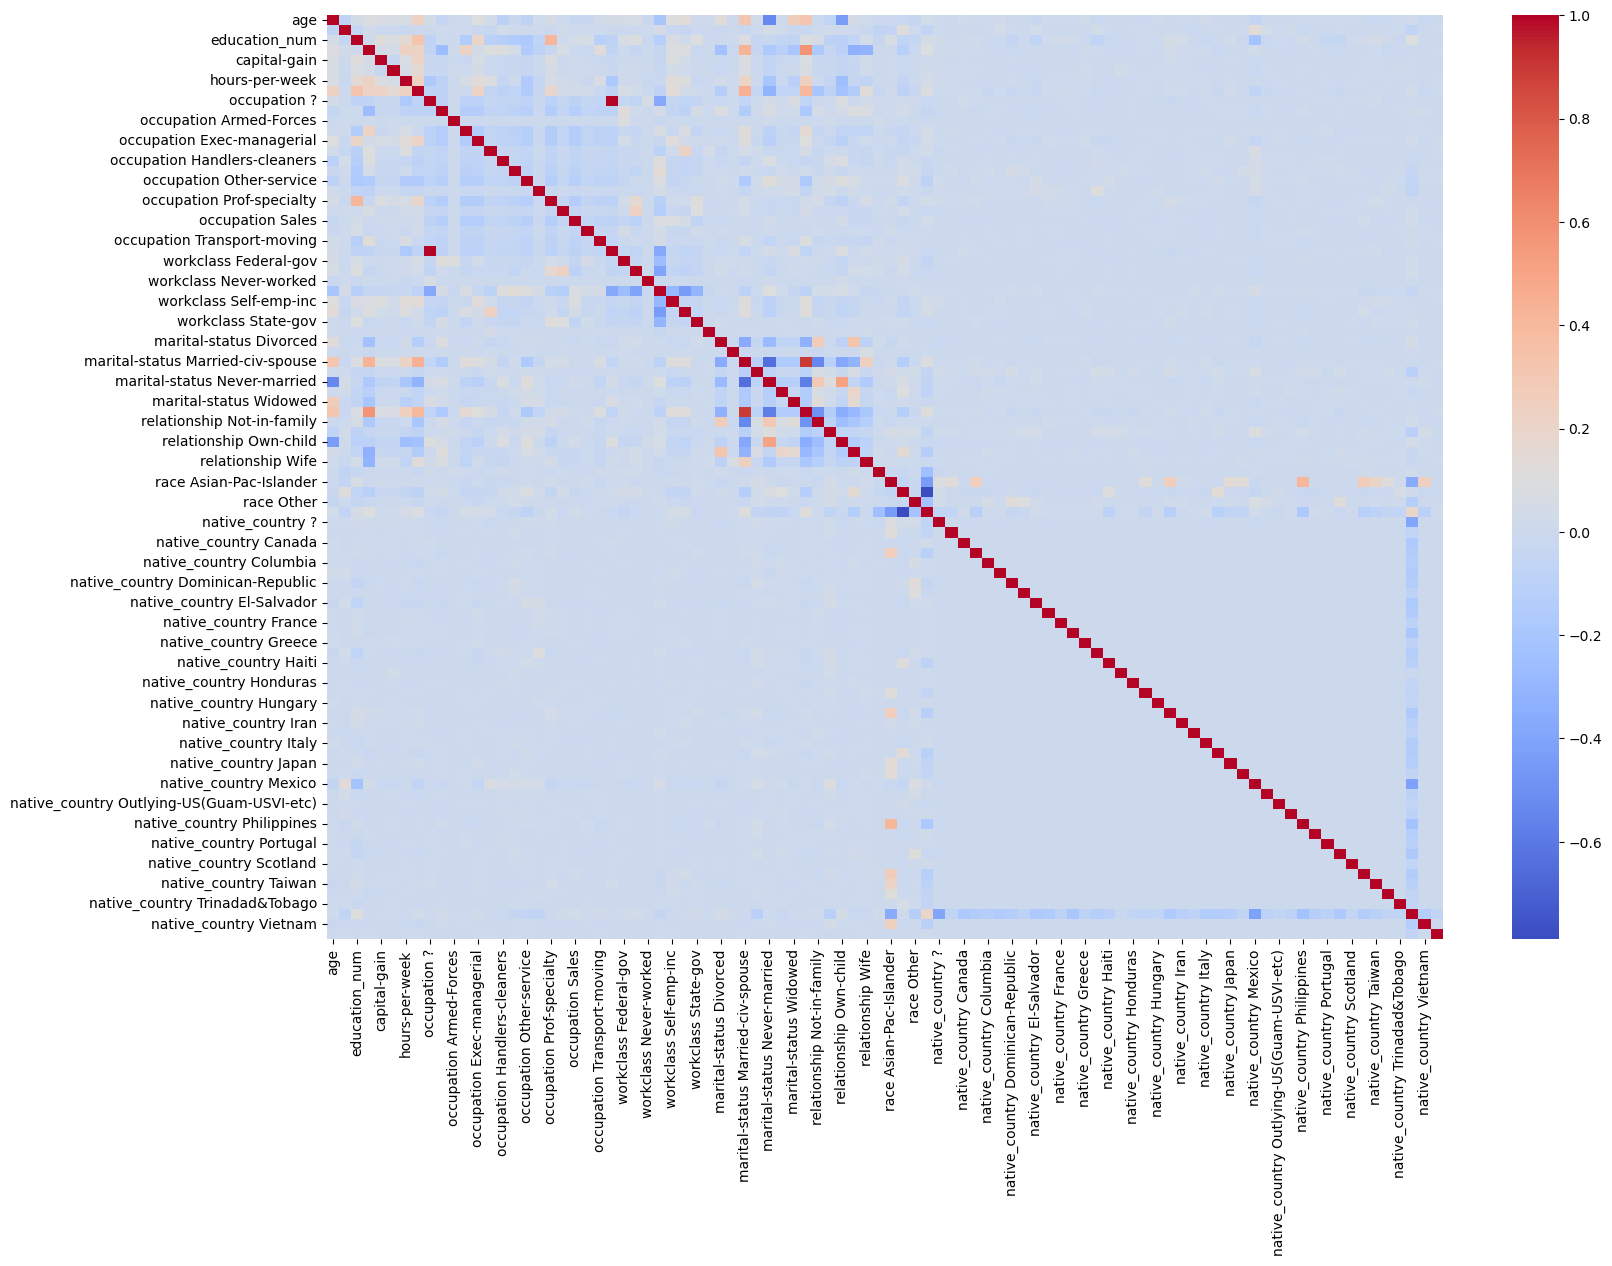

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=[18, 12])
sns.heatmap(df.corr(), annot=False, cmap = 'coolwarm')
# Finding out which variables have high correlation to incom

In [75]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8*len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis = 1)

In [76]:
df_dropped

,age,education_num,gender,capital-gain,capital-loss,hours-per-week,income,occupation Exec-managerial,occupation Other-service,occupation Prof-specialty,workclass Self-emp-inc,marital-status Divorced,marital-status Married-civ-spouse,marital-status Never-married,relationship Husband,relationship Not-in-family,relationship Own-child,relationship Unmarried,relationship Wife
0,39,13,1,2174,0,40,0,0,0,0,0,0,0,1,0,1,0,0,0
1,50,13,1,0,0,13,0,1,0,0,0,0,1,0,1,0,0,0,0
2,38,9,1,0,0,40,0,0,0,0,0,1,0,0,0,1,0,0,0
3,53,7,1,0,0,40,0,0,0,0,0,0,1,0,1,0,0,0,0
4,28,13,0,0,0,40,0,0,0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
32557,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
32558,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
32559,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

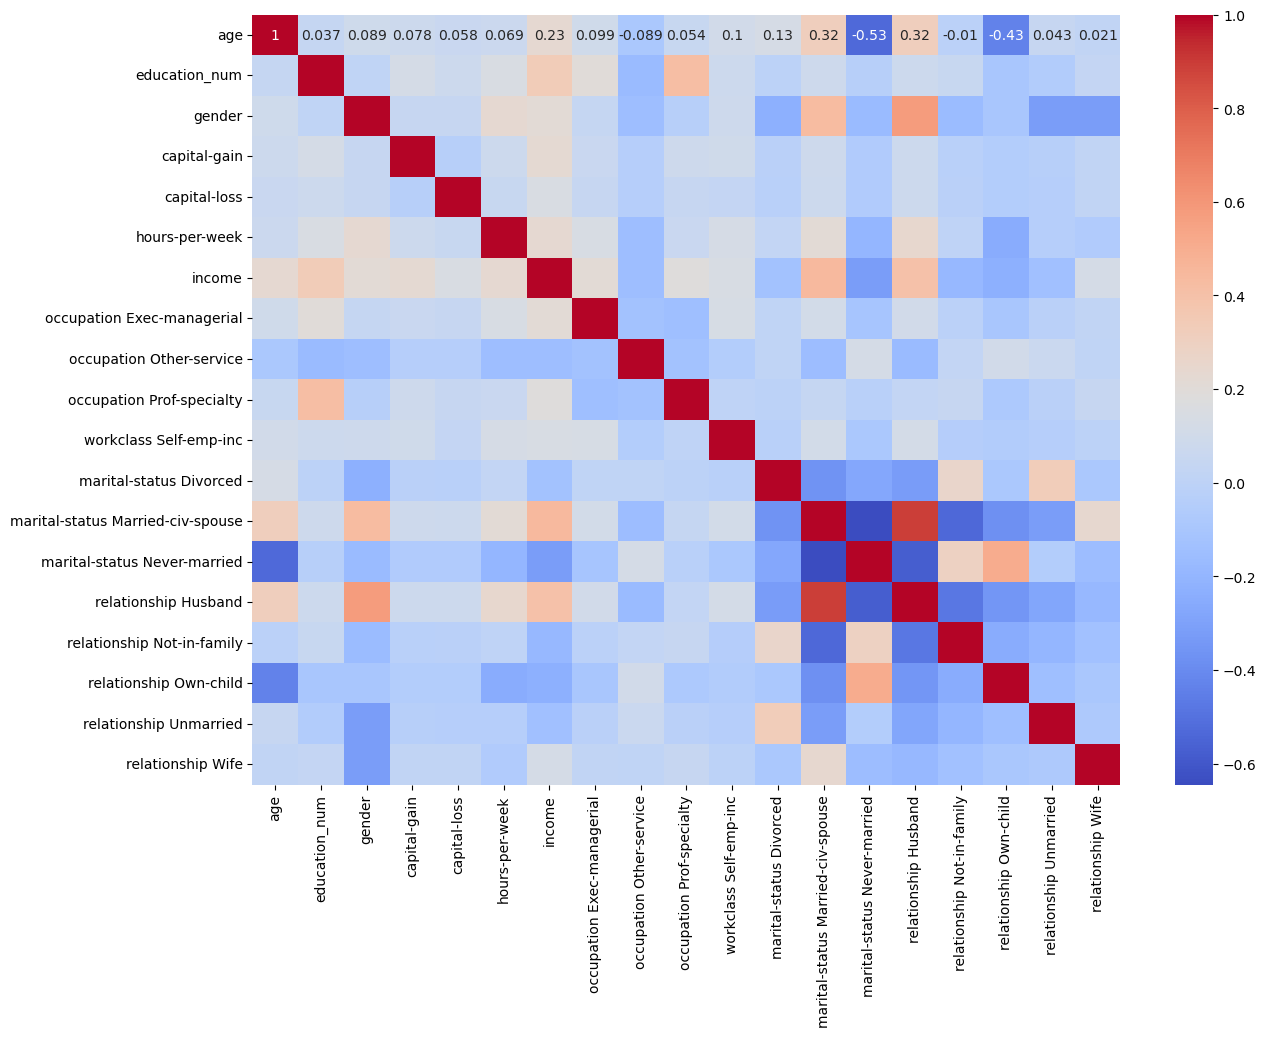

In [87]:
plt.figure(figsize=[14, 10])
sns.heatmap(df_dropped.corr(), annot=True, cmap = 'coolwarm')

# using less variables to find the data with high correlation to the income

# Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = df.drop('fnlwgt', axis = 1)

train_df, test_df = train_test_split(df, test_size = 0.2)

In [115]:
train_df

,age,education_num,gender,capital-gain,capital-loss,hours-per-week,income,occupation ?,occupation Adm-clerical,occupation Armed-Forces,...,native_country Portugal,native_country Puerto-Rico,native_country Scotland,native_country South,native_country Taiwan,native_country Thailand,native_country Trinadad&Tobago,native_country United-States,native_country Vietnam,native_country Yugoslavia
6853,36,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11519,41,9,1,2829,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
25603,28,10,1,0,0,24,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27477,26,10,1,0,0,18,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27525,45,13,0,5178,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28172,47,13,0,25236,0,35,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30665,42,9,1,0,0,60,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6252,26,10,1,0,0,42,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4744,36,8,1,4650,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [116]:
X_train = train_df.drop('income', axis = 1)
y_train = train_df['income']

X_test = test_df.drop('income', axis = 1)
y_test = test_df['income']

In [117]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [118]:
y_pred = forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4888
           1       0.72      0.62      0.67      1625

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



# Testing different models and seeing if the accuracy will be better than the 0.86 given by the RFC

# kNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [99]:
y_pred = knn_model.predict(X_test)

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4981
           1       0.42      0.46      0.44      1532

    accuracy                           0.73      6513
   macro avg       0.63      0.63      0.63      6513
weighted avg       0.73      0.73      0.73      6513



# Naive Bayes

In [101]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      4981
           1       0.66      0.32      0.43      1532

    accuracy                           0.80      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.78      0.80      0.77      6513



# SVC

In [103]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      4981
           1       0.98      0.16      0.27      1532

    accuracy                           0.80      6513
   macro avg       0.89      0.58      0.58      6513
weighted avg       0.84      0.80      0.74      6513



In [125]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse=True)}


In [126]:
importances

{'age': 0.2307225390389118,
 'education_num': 0.1318640299077979,
 'hours-per-week': 0.11211235747262233,
 'capital-gain': 0.10592514790059734,
 'marital-status Married-civ-spouse': 0.06837128262318858,
 'relationship Husband': 0.04709236000003968,
 'capital-loss': 0.03613241197802141,
 'marital-status Never-married': 0.024280095215928985,
 'occupation Exec-managerial': 0.01892379272126798,
 'occupation Prof-specialty': 0.018071752914126927,
 'gender': 0.014267357768008923,
 'relationship Not-in-family': 0.0109377943999655,
 'relationship Wife': 0.009996116690684995,
 'workclass Private': 0.009970952260865801,
 'relationship Own-child': 0.009317665605849455,
 'workclass Self-emp-not-inc': 0.008237816025358044,
 'occupation Other-service': 0.007906650575142787,
 'workclass Self-emp-inc': 0.007114895695647802,
 'marital-status Divorced': 0.006957652139836818,
 'occupation Sales': 0.0068019558199411264,
 'native_country United-States': 0.006538427501162346,
 'occupation Craft-repair': 0.0

In [129]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                          param_grid = param_grid, verbose=10)

# Giving our Forest model different parameters for training

In [130]:
grid_search.fit(X_train, y_train)

# Training our model

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.843 total time=   0.2s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.2s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.829 total time=   0.2s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   0.2s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [131]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_split=4, n_estimators=250)

In [133]:
forest = grid_search.best_estimator_

In [135]:
forest.score(X_test, y_test)

0.8570551205281745

In [136]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key = lambda x: x[1], reverse=True)}

importances

{'age': 0.15700774024172784,
 'education_num': 0.13475660193106953,
 'capital-gain': 0.1289575369982963,
 'hours-per-week': 0.09117006722058725,
 'marital-status Married-civ-spouse': 0.08672667344408648,
 'relationship Husband': 0.06492006671997477,
 'capital-loss': 0.04156156545840145,
 'marital-status Never-married': 0.029896291102566336,
 'occupation Exec-managerial': 0.02473475630201412,
 'occupation Prof-specialty': 0.021172343944614615,
 'gender': 0.015140728443946401,
 'relationship Not-in-family': 0.013309359469767863,
 'relationship Wife': 0.012864988990488808,
 'relationship Own-child': 0.011334152956347368,
 'workclass Private': 0.009372997530515114,
 'occupation Other-service': 0.009275701162355331,
 'workclass Self-emp-not-inc': 0.00896606431542482,
 'workclass Self-emp-inc': 0.008335378373842588,
 'marital-status Divorced': 0.008155782045902001,
 'relationship Unmarried': 0.006535229195493579,
 'occupation Sales': 0.006525235416475048,
 'native_country United-States': 0.0

In [ ]:
'''
from the above dataset I picked up that the age, occupation, marital status, capital gain, and capital loss where significant indicators of whether
someone's income is high or not. The variable, gender, I thought would have a significant determining factor proved to be the 11th most influential in the whole 
dataset. 
'''